# Визуализации для отчета

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal

### Описание поляризации при помощи векторов Джонса


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polarization(jones_vec, ax, color = 'orange'):
    """
    Функция для отображения направления вектора поляризации на координатной плоскости.
    Параметры:
        jones_vec (list): Вектор Джонса, состоящий из двух комплексных чисел или двух действительных чисел.
    """
    ax.set_aspect('equal')
    if isinstance(jones_vec[0], complex) or isinstance(jones_vec[1], complex):
        # Эллиптическая поляризация
        # Находим полуоси эллипса
        a = np.abs(jones_vec[0])
        b = np.abs(jones_vec[1])
        
        # Находим угол между главными осями эллипса и осью x
        if(np.abs(jones_vec[1]) != np.abs(jones_vec[0])):
            angle = np.arccos(np.abs(np.dot(jones_vec, [1, 0]) / (np.sqrt(jones_vec[0]**2 + jones_vec[1]**2))))
        else:
            angle = 0
        if np.imag(jones_vec[1]) > 0:
            dir = 'по часовой стрелке'
        else:
            dir = 'против часовой стрелки'

        # Рисуем эллипс
        ellipse = plt.Circle((0, 0), 1, fill=False, color = color, linewidth = 3, label = f'Эллиптическая поляризация, \n {dir}')
        ellipse.set_center((0, 0))
        ellipse.set_width(2 * a)
        ellipse.set_height(2 * b)
        ellipse.angle = np.degrees(angle)
        ax.add_artist(ellipse)
        
        # Устанавливаем пределы осей координат и сетку
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.grid(True)
        
    else:
        # Линейная или круговая поляризация
        # Находим угол между вектором поляризации и осью x
        angle = np.arccos(np.dot(jones_vec, [1, 0]) / (np.sqrt(jones_vec[0]**2 + jones_vec[1]**2)))
        # Создаем фигуру и оси координат
        
        ax.arrow(0, 0, jones_vec[0]* np.cos(angle),jones_vec[1] * np.sin(angle), head_width=0.05, head_length=0.1, color = color)
        ax.arrow(0, 0, -jones_vec[0] * np.cos(angle), -jones_vec[1]*np.sin(angle), head_width=0.05, head_length=0.1, color = color, label = 'Линейная поляризация')
        # Устанавливаем пределы осей координат и сетку
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.grid(True)
    ax.legend(loc = 'upper right')
        



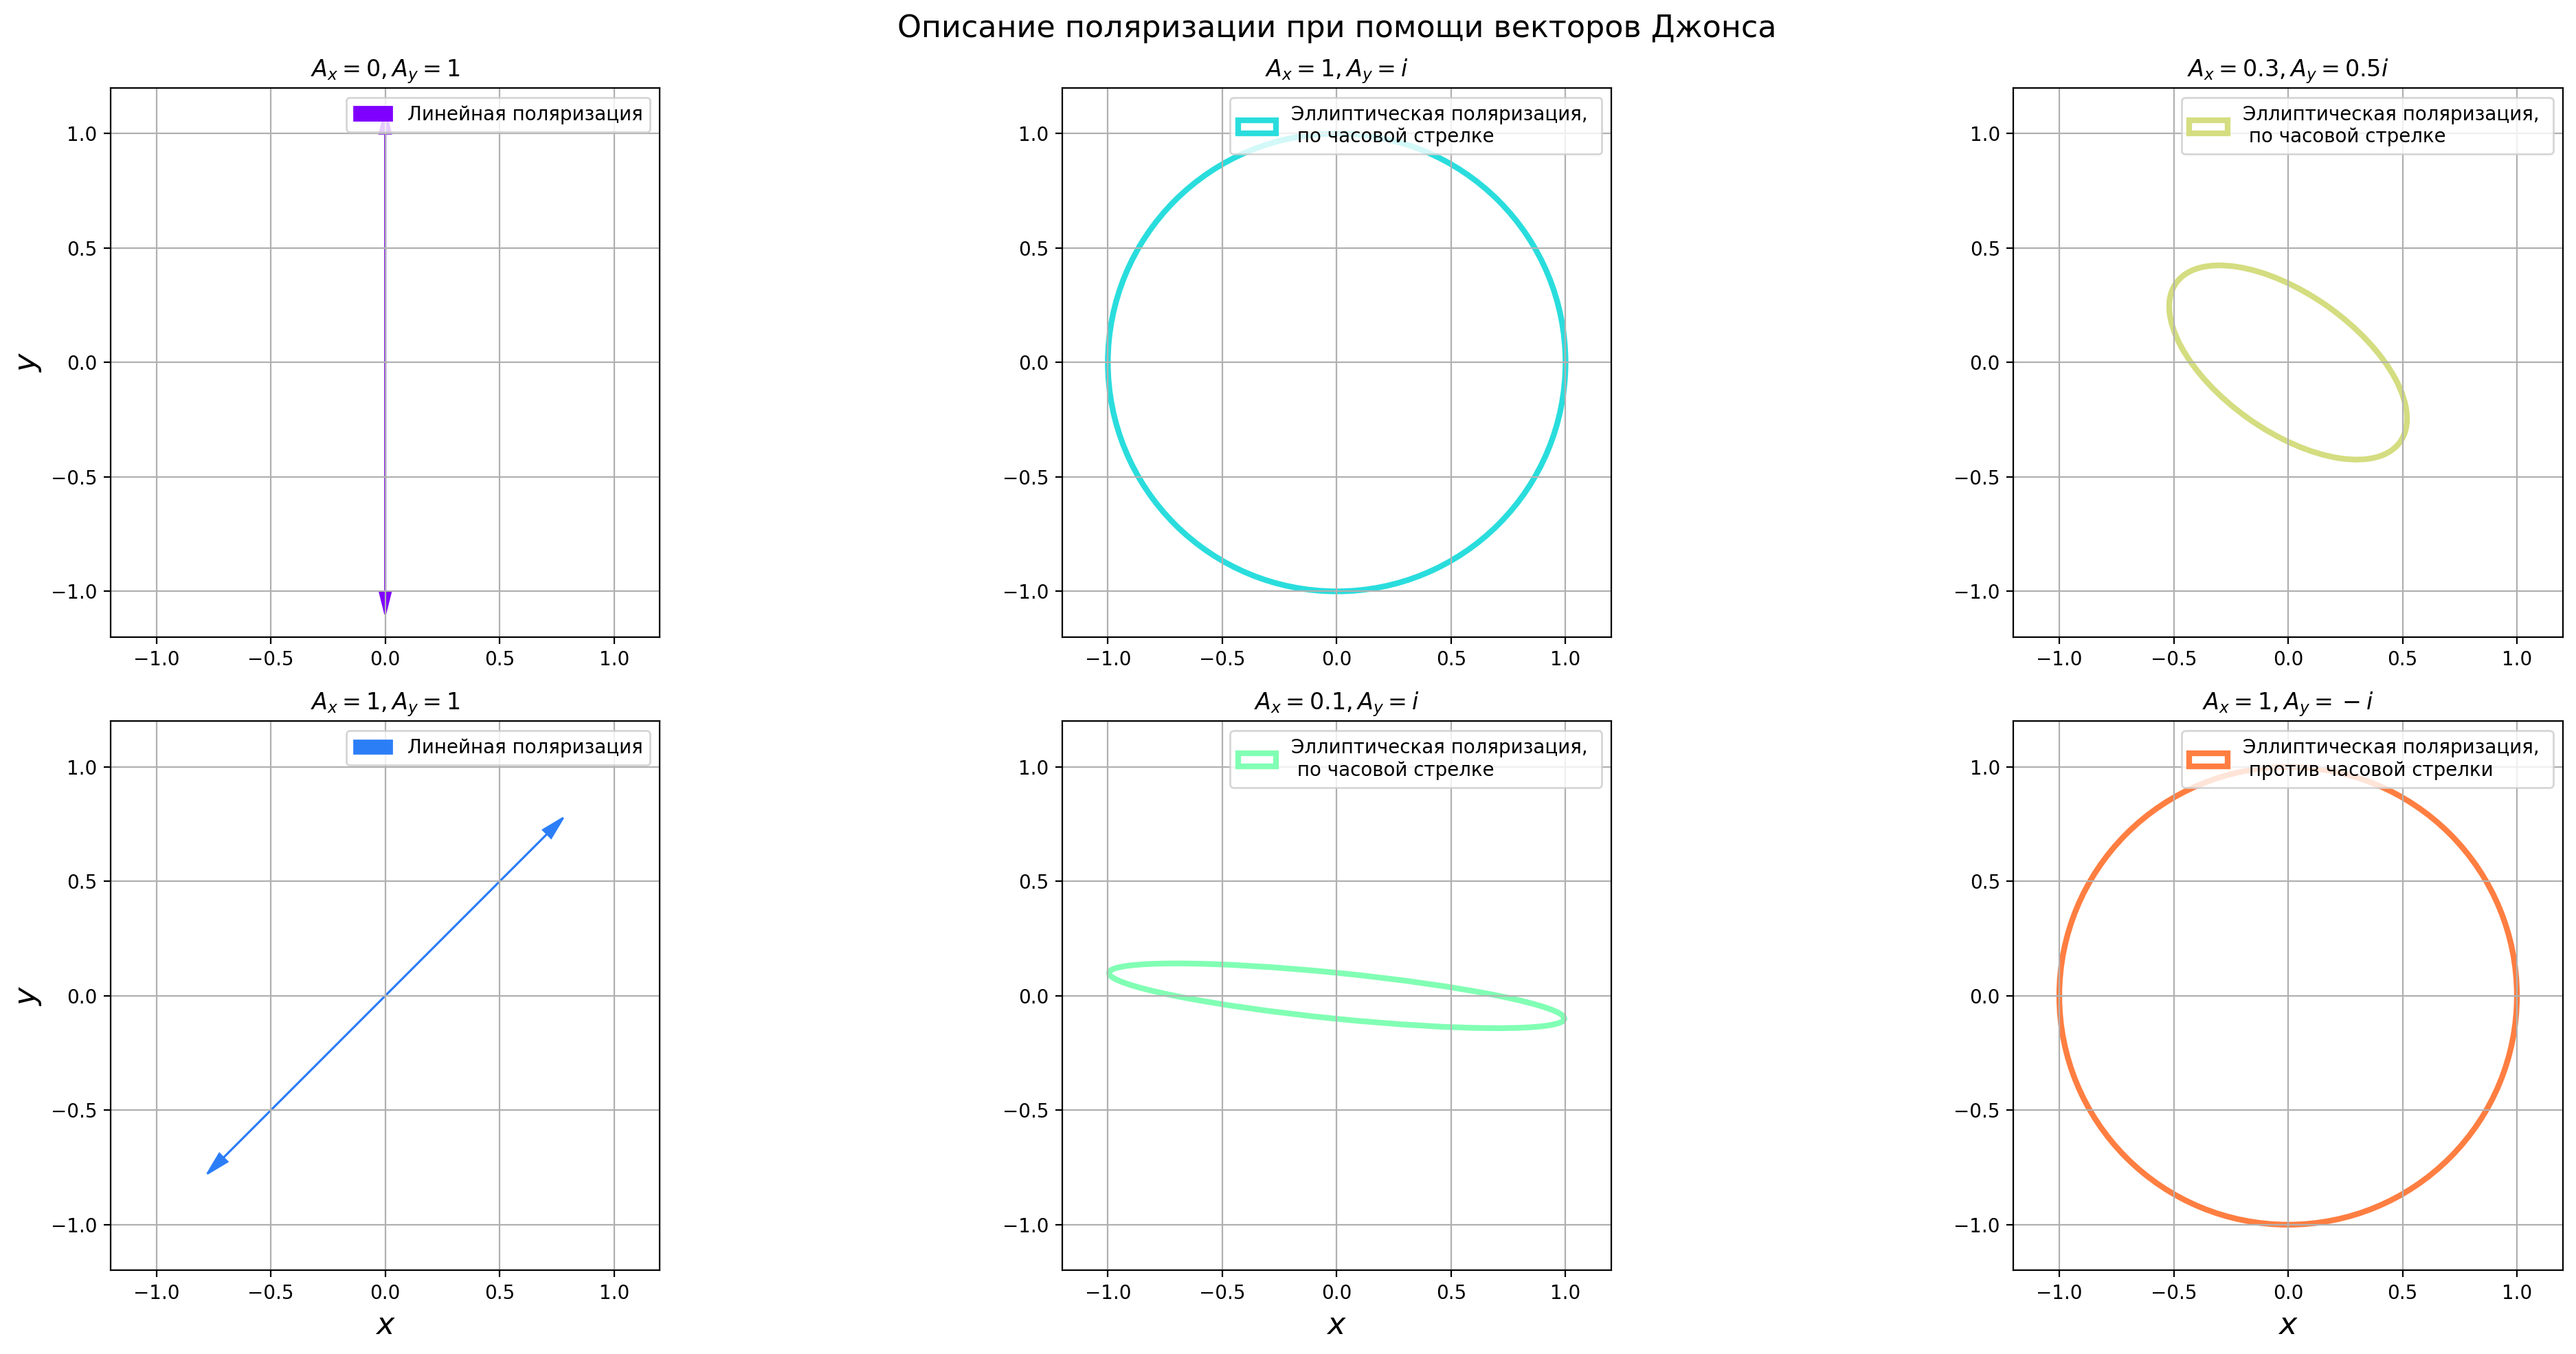

In [3]:
fig, ax = plt.subplots(2, 3, figsize = (22, 10), dpi = 200)

matricies = [[0, 1], [1, 1], [1, 1j], [0.1, 1j], [0.3, 0.6j], [1, -1j]]
names = ["$A_x = 0, A_y = 1$",
         "$A_x = 1, A_y = 1$",
         "$A_x = 1, A_y = i$",
         "$A_x = 0.1, A_y = i$",
         "$A_x = 0.3, A_y = 0.5 i$",
         "$A_x = 1, A_y = -i$"] 
for ind, (j, name) in enumerate(zip(matricies, names)):
    plotable = ax[ind % 2][ind // 2]
    plot_polarization(j, plotable, color = cm.rainbow(ind / 6))
    plotable.set_title(name)
    if(ind % 2): plotable.set_xlabel("$x$", fontsize = 16)
    if(not ind // 2): plotable.set_ylabel("$y$", fontsize = 16)
fig.suptitle("Описание поляризации при помощи векторов Джонса", fontsize = 16)
fig.tight_layout()